In [8]:
from os import system, listdir
import numpy as np
import random
from ph_flow import get_supercell, phonon_force
from plotband import read_banddata
import matplotlib.pyplot as plt
%matplotlib inline

* 1、 优化结构

In [11]:
# 优化结构
system('./smd.py opt --s=200 --g=POSCAR.unitcell  --n=8 --l=0')
system('cp in.fdf unitcell.fdf')


-  running siesta opt ...
-  Getting informations from directory /home/feng/mlff/cc/dwcnt/smd ...



Job completed


0

* 2 、先将结构文件转换为siesta输入文件

In [2]:
# 将结构文件转换为siesta输入文件
system('./smd.py w --g=id_unitcell.traj')


-  writing siesta input ...


0

* 3 、生成位移文件

In [3]:
# 生成位移文件
try:
   system('rm supercell-00*.fdf')
except:
   pass
system('phonopy --siesta -c=in.fdf -d --dim="8 8 1" --amplitude=0.01')

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.21.0

Compiled with OpenMP support (max 24 threads).
Python version 3.11.6
Spglib version 2.2.0

Calculator interface: siesta
Crystal structure was read from "in.fdf".
Unit of length: au
Displacements creation mode
Displacement distance: 0.01
Settings:
  Supercell: [8 8 1]
Spacegroup: P-1 (2)
Use -v option to watch primitive cell, unit cell, and supercell structures.

"phonopy_disp.yaml" and supercells have been created.

Summary of calculation was written in "phonopy_disp.yaml".
                 _
   ___ _ __   __| |
  / _ \ '_ \ / _` |
 |  __/ | | | (_| |
  \___|_| |_|\__,_|



0

* 4 、计算每个位移文件受力

In [4]:
n = get_supercell()
# 计算每个位移文件受力
for i in range(n):
    phonon_force(i+1,'siesta',8)
# system('cp force.0 lammps_forces_gp.0')

-  calculating structure 1 ...


Job completed


-  calculating structure 2 ...


Job completed


-  calculating structure 3 ...


Job completed


-  calculating structure 4 ...


Job completed


-  calculating structure 5 ...


Job completed


-  calculating structure 6 ...


Job completed


* 5、画出声子色散曲线

In [5]:
# 创建力常数文件
fs = ['Forces-00{:d}.FA'.format(i) for i in range(1,n+1)]
fs = ' '.join(fs)
system('phonopy -f {:s} --siesta'.format(fs))

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.21.0

Compiled with OpenMP support (max 24 threads).
Python version 3.11.6
Spglib version 2.2.0

Calculator interface: siesta
Displacements were read from "phonopy_disp.yaml".
1. Drift force of "Forces-001.FA" to be subtracted
  0.00002513   0.00124125  -0.00003188
2. Drift force of "Forces-002.FA" to be subtracted
 -0.00021198   0.00135637  -0.00002877
3. Drift force of "Forces-003.FA" to be subtracted
 -0.00013444   0.00125179  -0.00003120
4. Drift force of "Forces-004.FA" to be subtracted
 -0.00001160   0.00136984  -0.00003023
5. Drift force of "Forces-005.FA" to be subtracted
 -0.00000912   0.00126800  -0.00003165
6. Drift force of "Forces-006.FA" to be subtracted
 -0.00000107   0.00126820  -0.00003076
"FORCE

0

In [12]:
# 画出声子色散曲线
system('phonopy --siesta -c unitcell.fdf -p --dim="8 8 1" --band="0.0 0.0 0.0 1/4 0.0 0.0  0.5 0.0 0.0  2/3 -1/3 1/2 1/3 -1/6 0.0  0.0 0.0 0.0"')

        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.21.0

Compiled with OpenMP support (max 24 threads).
Python version 3.11.6
Spglib version 2.2.0

Calculator interface: siesta
Crystal structure was read from "unitcell.fdf".
Unit of length: au
Band structure mode
Settings:
  Supercell: [8 8 1]
Spacegroup: P-1 (2)
Use -v option to watch primitive cell, unit cell, and supercell structures.

Forces and displacements were read from "FORCE_SETS".
Computing force constants...
Max drift of force constants: 0.022283 (yx) 0.000001 (yy)

Reciprocal space paths in reduced coordinates:
[ 0.000  0.000  0.000] --> [ 0.250  0.000  0.000]
[ 0.250  0.000  0.000] --> [ 0.500  0.000  0.000]
[ 0.500  0.000  0.000] --> [ 0.667 -0.333  0.500]
[ 0.667 -0.333  0.500] --> [ 0.333 -0.167 

0

In [20]:
system('phonopy-bandplot --gnuplot band.yaml > band.dat')

256

* 6、进行对比

In [21]:
# 对数据重命名
system('mv band.dat band-{:s}.dat'.format('siesta'))

0

In [4]:
def get_plot_data(data):
    X   = []
    Y   = []
    
    for db in data:
        #print(db)
        if len(db)==0: continue
        db = np.array(db)
        n = len(db[:,0])
        x = db[:,0]#*unit
        y = db[:,1]#*yunit
        
        index_ = random.sample(range(n),20)
        x     = x[index_]
        y     = y[index_]
        # ax.plot(x,y,color='r',label='ReaxFF-nn')
        X.extend(x)
        Y.extend(y)
    return X,Y

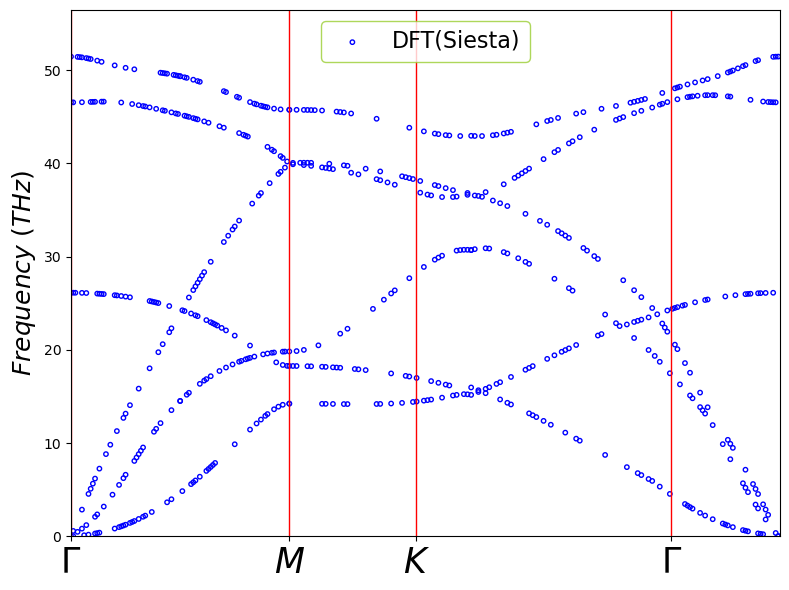

In [11]:
# 画图
# data_nn   = read_banddata('band-nn-gulp.dat')
data_qe   = read_banddata('band-siesta.dat')
# data_quip = read_banddata('band-quip.dat')
# data_dp = read_banddata('band-dp.dat')

plt.figure(figsize=(8,6))
plt.grid(visible=True,which='major',axis='x',color='r',lw=1)
ax = plt.subplot()
ax.set_ylabel(r"$Frequency$ ($THz$)", weight="medium",fontdict={"fontsize":18})
ax.set_xticks([0.00000000, 0.12362750, 0.19554850, 0.34])
ax.set_xticklabels([r"$\Gamma$", r"$M$", r"$K$", r"$\Gamma$"])
plt.xticks(fontsize=25)

X, Y = get_plot_data(data_qe)
xmax= np.max(X)
ymax= np.max(Y)

ax.scatter(X,Y,marker='o',color='none',edgecolors='b',s=10,label='DFT(Siesta)')

plt.xlim((0, xmax+0.001))
plt.ylim((0., ymax+5.0))
plt.legend(loc='upper center',ncol=2,edgecolor='yellowgreen',fontsize=16)
plt.tight_layout()
# plt.savefig("band.pdf")
plt.show()